# Import Libraries

1. '**from google.colab import file**' module is used to enable file upload functionality which used to upload the sensor data to the google colab environment. (Reference : https://saturncloud.io/blog/uploading-local-files-using-google-colab/ Step 2. I already tired Step 1, 3 in my previous assignments on machine learning and BIS so need to try other methods)

2. '**import pandas as pd**' - pandas library is used for data analysis and this provide the dataframe structures to handle the detaset in tabular form which is easy for manupulate like in the database.

3. '**import matplotlib.pyplot as plt**' - library for create illustrations and visualasation in python, here its used to plot sensor locations on the map.

4. '**from IPython.display import display**' - the display function from the IPython.display is used to show tabes in much interactive format. The tables are used for cleaned_data table to validate the plots on map with the cleaned data. Also distribution of grow sensors in the latitude and longitude is iterated in to a distribution chart so that the plotting can be validated.

5. '**from matplotlib.offsetbox import OffsetImage, AnnotationBbox**' - this function is used to overlay the plots into the map images. (Reference : https://medium.com/analytics-vidhya/how-to-plot-image-and-text-on-matplotlib-91d7f23a3043 )

In [6]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Upload & Read CSV file to dataframe

The below line of codes are for uploading the CSV from the local drive the module in GoogleColab and reading the files into a Pandas DataFrame. There will be a prompt to user to upload the file and after uploading the data in the CSV is read into the DataFrame named 'data'

Reference : https://saturncloud.io/blog/uploading-local-files-using-google-colab/ Step 2

In [32]:
# Upload the 'Growlocations.csv' file
uploaded = files.upload()

# Read the data into a DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

Saving GrowLocations.csv to GrowLocations.csv


# Cleaning & Filtering Data

The code filters the latitude and longitude in the desired range between the location frame bound with in the map provided. And the filtered rows are write into a new dataframe called - 'cleaned_data'. Then the cleaned data frame is displayed for validation and check the distribution.

In [19]:
# Function to filter and clean the data
def clean_data_1(data):
    # Filter rows out of desired latitude and longitude range
    valid_data = data[(data['Latitude'] >= 50.0) & (data['Latitude'] <= 58.0) &
                      (data['Longitude'] >= -11.0) & (data['Longitude'] <= 2.0)]
    return valid_data

# Clean the data
cleaned_data_1 = clean_data_1(data)

print("\nCleaned Data:")
display(cleaned_data_1)


Cleaned Data:


,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
22026,PI040298AD5I214048,54.443,-1.934,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_98b4dscx,2019-05-23T16:11:17.000Z,2019-10-23T17:18:06.000Z
22027,PI040298AD5I214048,54.443,-1.934,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_98b4dscx,2019-05-23T16:11:17.000Z,2019-10-23T17:18:06.000Z
22028,PI040298AD5I214048,54.443,-1.934,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_98b4dscx,2019-05-23T16:11:17.000Z,2019-10-23T17:18:06.000Z
22029,PI040298AD5I214048,54.443,-1.934,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_98b4dscx,2019-05-23T16:11:17.000Z,2019-10-23T17:18:06.000Z
22030,PI040298AD5I214048,54.443,-1.934,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_98b4dscx,2019-05-23T16:11:17.000Z,2019-10-23T17:18:06.000Z
...,...,...,...,...,...,...,...,...
22465,"PI040298AD5G204372. FuturePractice:,Id:795,Lan...",53.444,-1.934,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_g82a07b3,2019-05-23T15:21:53.000Z,2019-10-23T17:14:56.000Z
22466,"PI040298AD5G204372. FuturePractice:,Id:795,Lan...",53.444,-1.934,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_g82a07b3,2019-05-23T15:21:53.000Z,2019-10-23T17:14:56.000Z
22467,"PI040298AD5G204372. FuturePractice:,Id:795,Lan...",53.444,-1.934,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_g82a07b3,2019-05-23T15:21:53.000Z,2019-10-23T17:14:56.000Z
22468,"PI040298AD5G204372. FuturePractice:,Id:795,Lan...",53.444,-1.934,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_g82a07b3,2019-05-23T15:21:53.000Z,2019-10-23T17:14:56.000Z


# Plotting the Map to provided image

The below code loads the map image, create the plot of map and sensor location and plot the valid sensor location to the map and display the same and generate output_map.

Reference : https://medium.com/analytics-vidhya/how-to-plot-image-and-text-on-matplotlib-91d7f23a3043

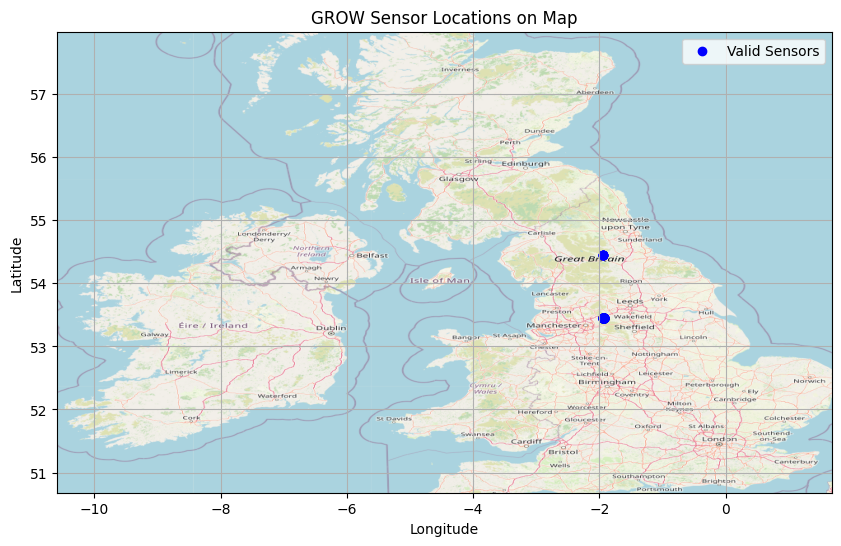

In [30]:
# Load the map image
map_image = plt.imread('map.png')

# Plot the map and sensor locations
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(map_image, extent=[-10.592, 1.6848, 50.681, 57.985])

# Plot the valid sensor locations
ax.scatter(cleaned_data_1['Longitude'], cleaned_data_1['Latitude'], marker='o', color='blue', label='Valid Sensors')

# Display the map and sensor locations
plt.title('GROW Sensor Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Save the output to a file named 'outputmap.png'
plt.savefig('outputmap_1.png')
plt.show()


## Distribution of Sensors

While comparing the sample map plot the plot gathered from the code seams to be bit downsized with the results occured, so the validation is done for the correctness of the results generated. so check the distribution of longitude where the desired longitude ranges are occuring in a very close range so the while ploting to the map some of the data will be marginalised and count together. Also in regard with the Latitude there is on two latitude having most prior occurance ie. 54.443 (below 20 occurance) & 53.444 (over 100+ occurance) from total occurance of 120 in the cleaned data.

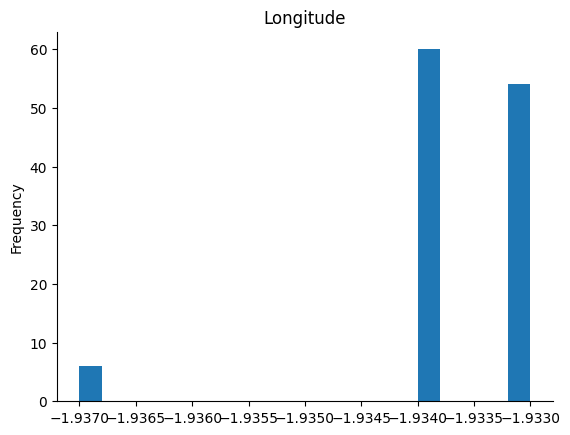

In [21]:
from matplotlib import pyplot as plt
cleaned_data_1['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

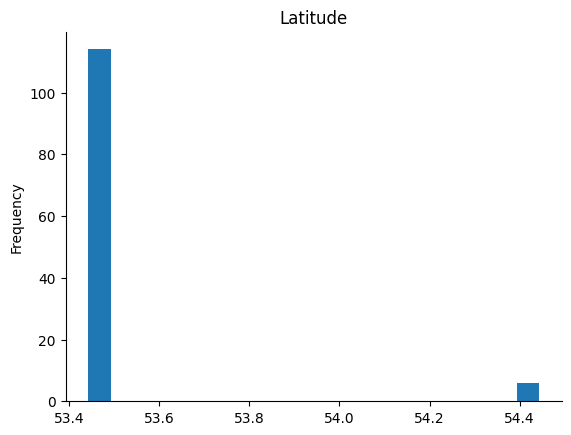

In [22]:
from matplotlib import pyplot as plt
cleaned_data_1['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

Zoomed Plotting of the Maximum Occured Latitude and Longitude to Showcase the 4 Sensor location in the desired location range. Since the range of 3 longitudes in the latitude - 53.444 is close so in map the the 3 are seems to be plotted in a single point where there 3 points are also plotted.

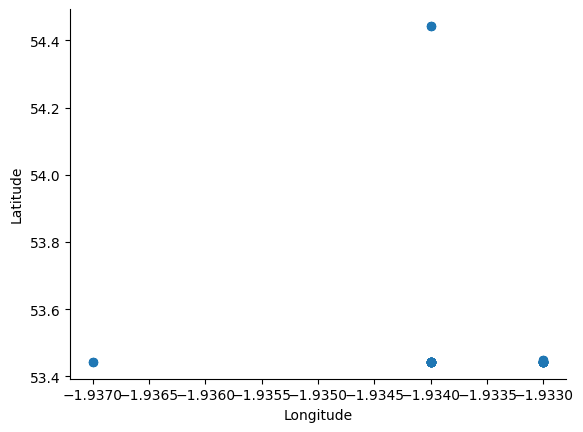

In [23]:
from matplotlib import pyplot as plt
cleaned_data_1.plot(kind='scatter', y='Latitude', x='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Assumptions

Either there are too much missing data or the these is some issues with the data provided. In the Task there is mentioning regarding the incorrectness of the column names so considering the Latitude and Longitude coloumn names are interchanged, and generating the processes by swapping the limits of longitudes to latitude and vice-versa.

# After Swapping the Longitude and Latitude


In [45]:
# Function to filter and clean the data
def clean_data_2(data):
    # Filter rows out of desired latitude and longitude range
    valid_data = data[(data['Longitude'] >= 50.0) & (data['Longitude'] <= 58.0) &
                      (data['Latitude'] >= -11.0) & (data['Latitude'] <= 2.0)]
    return valid_data

# Clean the data
cleaned_data_2 = clean_data_2(data)

print("\nCleaned Data:")
display(cleaned_data_2)


Cleaned Data:


,Serial,Longitude,Latitude,Type,SensorType,Code,BeginTime,EndTime
20166,PI040307AA4E027607,51.966,1.015,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_9k09wrsy,2019-05-23T17:17:17.000Z,2019-10-25T14:54:06.000Z
20167,PI040307AA4E027607,51.966,1.015,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_9k09wrsy,2019-05-23T17:17:17.000Z,2019-10-25T14:54:06.000Z
20168,PI040307AA4E027607,51.966,1.015,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_9k09wrsy,2019-05-23T17:17:17.000Z,2019-10-25T14:54:06.000Z
20169,PI040307AA4E027607,51.966,1.015,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_9k09wrsy,2019-05-23T17:17:17.000Z,2019-10-25T14:54:06.000Z
20170,PI040307AA4E027607,51.966,1.015,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_9k09wrsy,2019-05-23T17:17:17.000Z,2019-10-25T14:54:06.000Z
...,...,...,...,...,...,...,...,...
32515,PI040298AD5I207356,54.738,-8.427,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_ktbka4qy,2019-02-04T11:30:01.000Z,2019-10-21T10:44:13.000Z
32516,PI040298AD5I207356,54.738,-8.427,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_ktbka4qy,2019-02-04T11:30:01.000Z,2019-10-21T10:44:13.000Z
32517,PI040298AD5I207356,54.738,-8.427,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_ktbka4qy,2019-02-04T11:30:01.000Z,2019-10-21T10:44:13.000Z
32518,PI040298AD5I207356,54.738,-8.427,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_ktbka4qy,2019-02-04T11:30:01.000Z,2019-10-21T10:44:13.000Z


## Distribution of Sensors after swapping

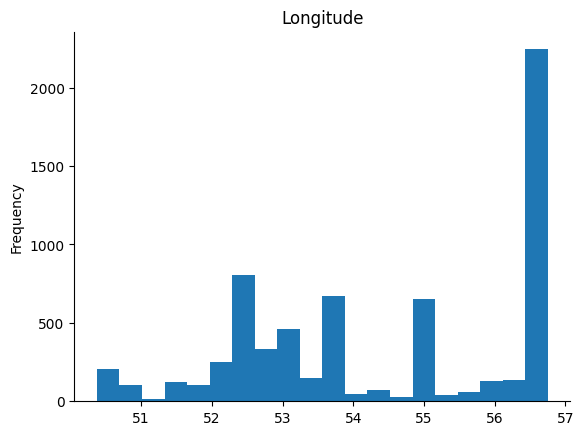

In [46]:
from matplotlib import pyplot as plt
cleaned_data_2['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

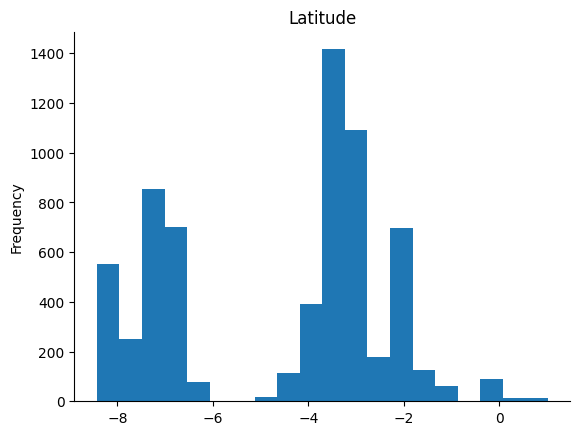

In [47]:
from matplotlib import pyplot as plt
cleaned_data_2['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

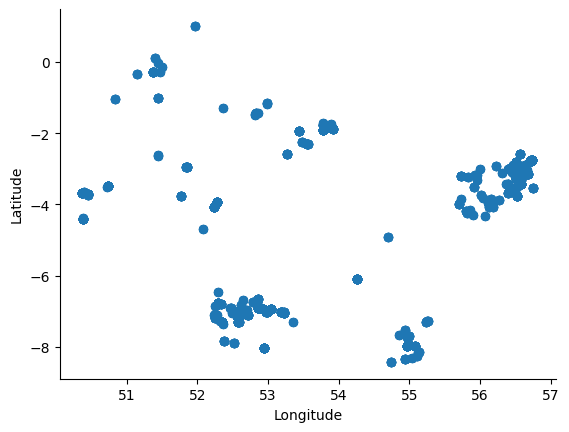

In [26]:
from matplotlib import pyplot as plt
cleaned_data_2.plot(kind='scatter', y='Latitude', x='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Plotting after Swapping the Axis

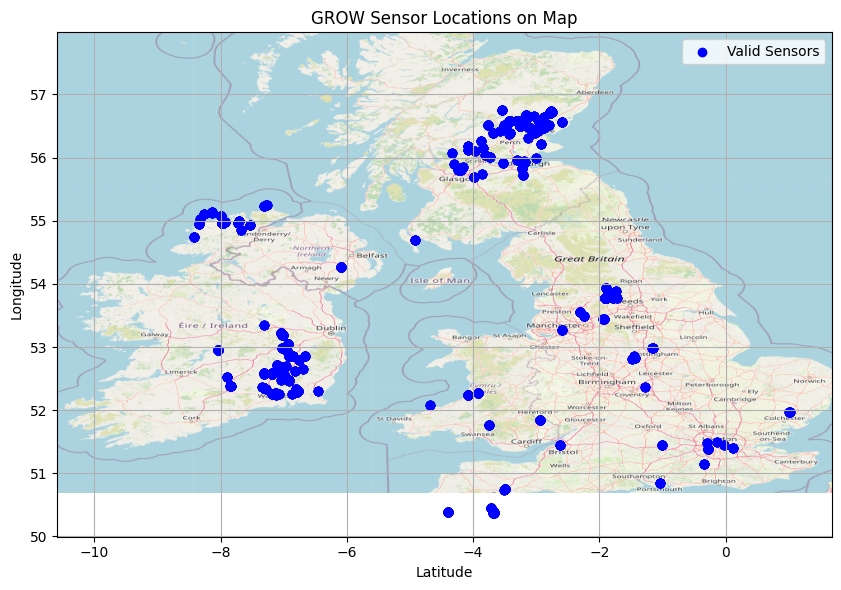

In [48]:
# Load the map image
map_image = plt.imread('map.png')

# Overlay the map image over the plotted sensor locations in given latitude and longitude range
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(map_image, extent=[ -10.592, 1.6848,50.681, 57.985,])

# Plot the valid sensor locations in the cleaned data with scatter methods
ax.scatter(cleaned_data_2['Latitude'], cleaned_data_2['Longitude'], marker='o', color='blue', label='Valid Sensors')

# Display the map and sensor locations
plt.title('GROW Sensor Locations on Map')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.legend()
plt.grid(True)

# Save the output to a file named 'outputmap.png'
plt.savefig('outputmap_2.png')
plt.show()

# Assumption

By swapping the values the desired result is generated. But the values on axis is different than the desired result. To confirm the result a validation is required by manual swapping of Longitude and latitude data in the CSV, so a new CSV file is saved after swapping the names of longitude and latitude. Also there are some missing data or outer data in the plotting need to trim the filtering range for an accurate mapping

# Validating Result after manually swapping the Longitude and Latitude in CSV File



In [49]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Upload the 'Growlocations.csv' file
uploaded = files.upload()

# Read the data into a DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

Saving GrowLocations1.csv to GrowLocations1.csv


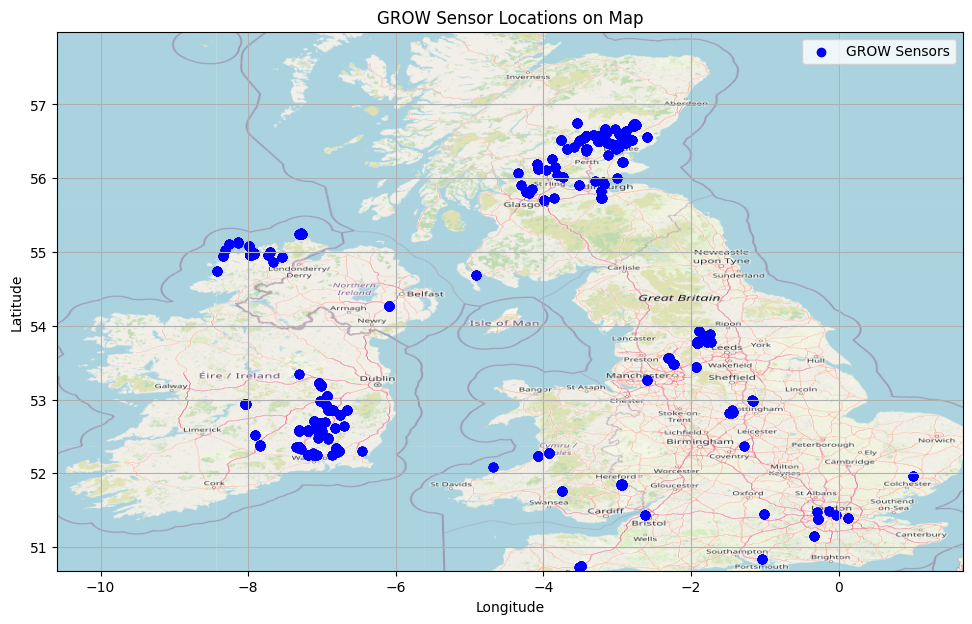

In [50]:
# Function to filter and clean the data
def clean_data(data):
    # Filter rows out of desired latitude and longitude range
    valid_data = data[(data['Longitude'] >= -10.60 ) & (data['Longitude'] <= 1.70) &
                      (data['Latitude'] >= 50.60) & (data['Latitude'] <=58.0 )]
    return valid_data

# Clean the data
cleaned_data = clean_data(data)

# Load the map image
map_image = plt.imread('map.png')

# Overlay the map image over the plotted sensor locations in given latitude and longitude range
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(map_image, extent=[ -10.592, 1.6848,50.681, 57.985])

# Plot the valid sensor locations in the cleaned data with scatter methods
ax.scatter(cleaned_data['Longitude'], cleaned_data['Latitude'], marker='o', color='blue', label='GROW Sensors')

# Display the map and sensor locations
plt.title('GROW Sensor Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Save the output to a file named 'outputmap.png'
plt.savefig('outputmap.png')
plt.show()

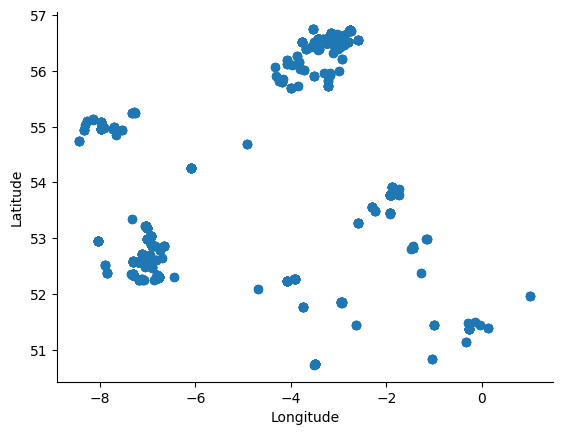

In [51]:
from matplotlib import pyplot as plt
cleaned_data.plot(kind='scatter', x='Longitude',y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Assumption

From the validation the incorrectness of the column names are validated. Also the trimming the values of the filter values close to the values on the map boundaries make the mapping perfectly fits inside the mapping region.